In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [210]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [211]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True)
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df = df[['text','target']]
df

text target
0     Go until jurong point, crazy.. Available only ...    ham
1                         Ok lar... Joking wif u oni...    ham
2     Free entry in 2 a wkly comp to win FA Cup fina...   spam
3     U dun say so early hor... U c already then say...    ham
4     Nah I don't think he goes to usf, he lives aro...    ham
...                                                 ...    ...
5567  This is the 2nd time we have tried 2 contact u...   spam
5568              Will Ì_ b going to esplanade fr home?    ham
5569  Pity, * was in mood for that. So...any other s...    ham
5570  The guy did some bitching but I acted like i'd...    ham
5571                         Rofl. Its true to its name    ham

[5572 rows x 2 columns]

# Label Encoding

In [212]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
le.classes_

array(['ham', 'spam'], dtype=object)

In [213]:
df

text  target
0     Go until jurong point, crazy.. Available only ...       0
1                         Ok lar... Joking wif u oni...       0
2     Free entry in 2 a wkly comp to win FA Cup fina...       1
3     U dun say so early hor... U c already then say...       0
4     Nah I don't think he goes to usf, he lives aro...       0
...                                                 ...     ...
5567  This is the 2nd time we have tried 2 contact u...       1
5568              Will Ì_ b going to esplanade fr home?       0
5569  Pity, * was in mood for that. So...any other s...       0
5570  The guy did some bitching but I acted like i'd...       0
5571                         Rofl. Its true to its name       0

[5572 rows x 2 columns]

# Cleaning DataFrame; null and duplicated values

In [214]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [215]:
df.duplicated().sum()

np.int64(403)

In [216]:
df.drop_duplicates(keep='first', inplace=True)
df

text  target
0     Go until jurong point, crazy.. Available only ...       0
1                         Ok lar... Joking wif u oni...       0
2     Free entry in 2 a wkly comp to win FA Cup fina...       1
3     U dun say so early hor... U c already then say...       0
4     Nah I don't think he goes to usf, he lives aro...       0
...                                                 ...     ...
5567  This is the 2nd time we have tried 2 contact u...       1
5568              Will Ì_ b going to esplanade fr home?       0
5569  Pity, * was in mood for that. So...any other s...       0
5570  The guy did some bitching but I acted like i'd...       0
5571                         Rofl. Its true to its name       0

[5169 rows x 2 columns]

# EDA

<b>Counting how many instances are ham and spam</b>

In [217]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<b>Representing in Pie-Chart (better vizualization)</b>

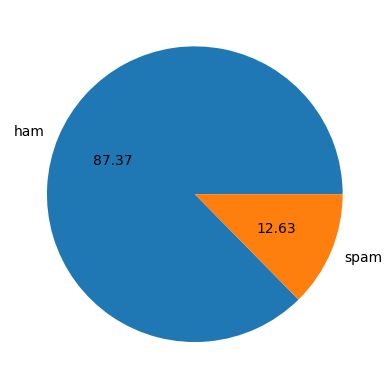

In [218]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

<b>Counting number of characters in each text</b>

In [219]:
df['num_characters'] = df['text'].apply(len)
df

text  target  \
0     Go until jurong point, crazy.. Available only ...       0   
1                         Ok lar... Joking wif u oni...       0   
2     Free entry in 2 a wkly comp to win FA Cup fina...       1   
3     U dun say so early hor... U c already then say...       0   
4     Nah I don't think he goes to usf, he lives aro...       0   
...                                                 ...     ...   
5567  This is the 2nd time we have tried 2 contact u...       1   
5568              Will Ì_ b going to esplanade fr home?       0   
5569  Pity, * was in mood for that. So...any other s...       0   
5570  The guy did some bitching but I acted like i'd...       0   
5571                         Rofl. Its true to its name       0   

      num_characters  
0                111  
1                 29  
2                155  
3                 49  
4                 61  
...              ...  
5567             161  
5568              37  
5569              57  
5570             125  
5571              26  

[5169 rows x 3 columns]

<b>Counting number of words in each text</b>

In [220]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Acer1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [221]:
print(nltk.data.find('tokenizers/punkt'))

C:\Users\Acer1\AppData\Roaming\nltk_data\tokenizers\punkt


In [222]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df


text  target  \
0     Go until jurong point, crazy.. Available only ...       0   
1                         Ok lar... Joking wif u oni...       0   
2     Free entry in 2 a wkly comp to win FA Cup fina...       1   
3     U dun say so early hor... U c already then say...       0   
4     Nah I don't think he goes to usf, he lives aro...       0   
...                                                 ...     ...   
5567  This is the 2nd time we have tried 2 contact u...       1   
5568              Will Ì_ b going to esplanade fr home?       0   
5569  Pity, * was in mood for that. So...any other s...       0   
5570  The guy did some bitching but I acted like i'd...       0   
5571                         Rofl. Its true to its name       0   

      num_characters  num_words  
0                111         24  
1                 29          8  
2                155         37  
3                 49         13  
4                 61         15  
...              ...        ...  
5567             161         35  
5568              37          9  
5569              57         15  
5570             125         27  
5571              26          7  

[5169 rows x 4 columns]

<b>Counting number of sentences in each text</b>

In [223]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

text  target  \
0     Go until jurong point, crazy.. Available only ...       0   
1                         Ok lar... Joking wif u oni...       0   
2     Free entry in 2 a wkly comp to win FA Cup fina...       1   
3     U dun say so early hor... U c already then say...       0   
4     Nah I don't think he goes to usf, he lives aro...       0   
...                                                 ...     ...   
5567  This is the 2nd time we have tried 2 contact u...       1   
5568              Will Ì_ b going to esplanade fr home?       0   
5569  Pity, * was in mood for that. So...any other s...       0   
5570  The guy did some bitching but I acted like i'd...       0   
5571                         Rofl. Its true to its name       0   

      num_characters  num_words  num_sentences  
0                111         24              2  
1                 29          8              2  
2                155         37              2  
3                 49         13              1  
4                 61         15              1  
...              ...        ...            ...  
5567             161         35              4  
5568              37          9              1  
5569              57         15              2  
5570             125         27              1  
5571              26          7              2  

[5169 rows x 5 columns]

<b>Describe Method on dataframe</b>

In [224]:
df[['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

<b>Describe Method for ham(0) texts</b>

In [227]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

<b>Describe Method for spam(1) texts</b>

In [228]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000

<b>Histogram for num_characters</b>

<Axes: xlabel='num_characters', ylabel='Count'>

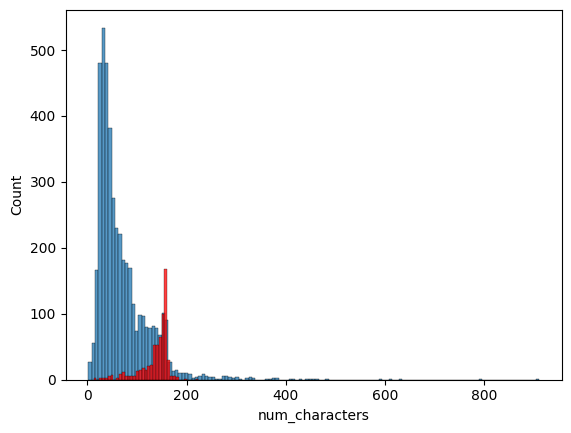

In [234]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<b>Histogram for num_characters</b>

<Axes: xlabel='num_words', ylabel='Count'>

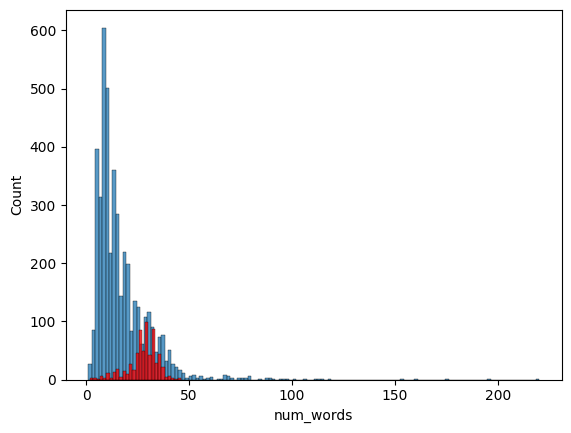

In [235]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

<b>Pairplot</b>

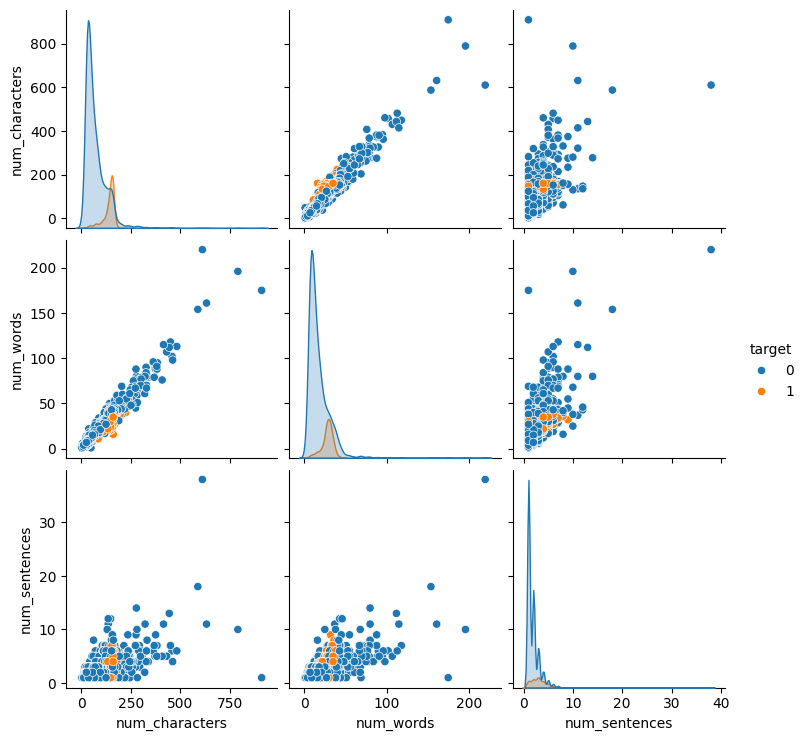

In [236]:
sns.pairplot(df,hue='target')

<b>Correlation between columns</b>

In [240]:
df[['target','num_characters','num_words','num_sentences']].corr()

target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.262912       0.263939
num_characters  0.384717        1.000000   0.965760       0.624139
num_words       0.262912        0.965760   1.000000       0.679971
num_sentences   0.263939        0.624139   0.679971       1.000000

<b>Converting text to lower case</b>